# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [10]:
# Import the titanic dataset here
import numpy as np
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
list(df_titanic.columns)
df_titanic.head(1)

name gender   age class embarked        country  ticketno  \
0  Abbing, Mr. Anthony   male  42.0   3rd        S  United States    5547.0   

   fare  survived  
0  7.11         0

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [11]:
# Code here
df = df_titanic[df_titanic["class"].isin(["1st", "2nd", "3rd"])].dropna(subset=["embarked"]).copy()

xtab = pd.crosstab(df["class"], df["embarked"])
xtab

embarked  B    C    Q    S
class                     
1st       3  143    3  175
2nd       6   26    7  245
3rd       0  102  113  494

In [ ]:
print(df_titanic.columns)

## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [12]:
# Code here
cond_class_given_emb = pd.crosstab(df["class"], df["embarked"], normalize="columns")

cond_embarked_given_class = pd.crosstab(df["class"], df["embarked"], normalize="index")

p_S_given_3rd = float(cond_embarked_given_class.loc["3rd", "S"])

p_3rd_given_S = float(cond_class_given_emb.loc["3rd", "S"])

print("P(Southampton | class=3rd) =", p_S_given_3rd)
print("P(class=3rd | Southampton) =", p_3rd_given_S)

cond_class_given_emb, cond_embarked_given_class

P(Southampton | class=3rd) = 0.6967559943582511
P(class=3rd | Southampton) = 0.5404814004376368


(embarked         B         C         Q         S
 class                                           
 1st       0.333333  0.527675  0.024390  0.191466
 2nd       0.666667  0.095941  0.056911  0.268053
 3rd       0.000000  0.376384  0.918699  0.540481,
 embarked         B         C         Q         S
 class                                           
 1st       0.009259  0.441358  0.009259  0.540123
 2nd       0.021127  0.091549  0.024648  0.862676
 3rd       0.000000  0.143865  0.159379  0.696756)

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

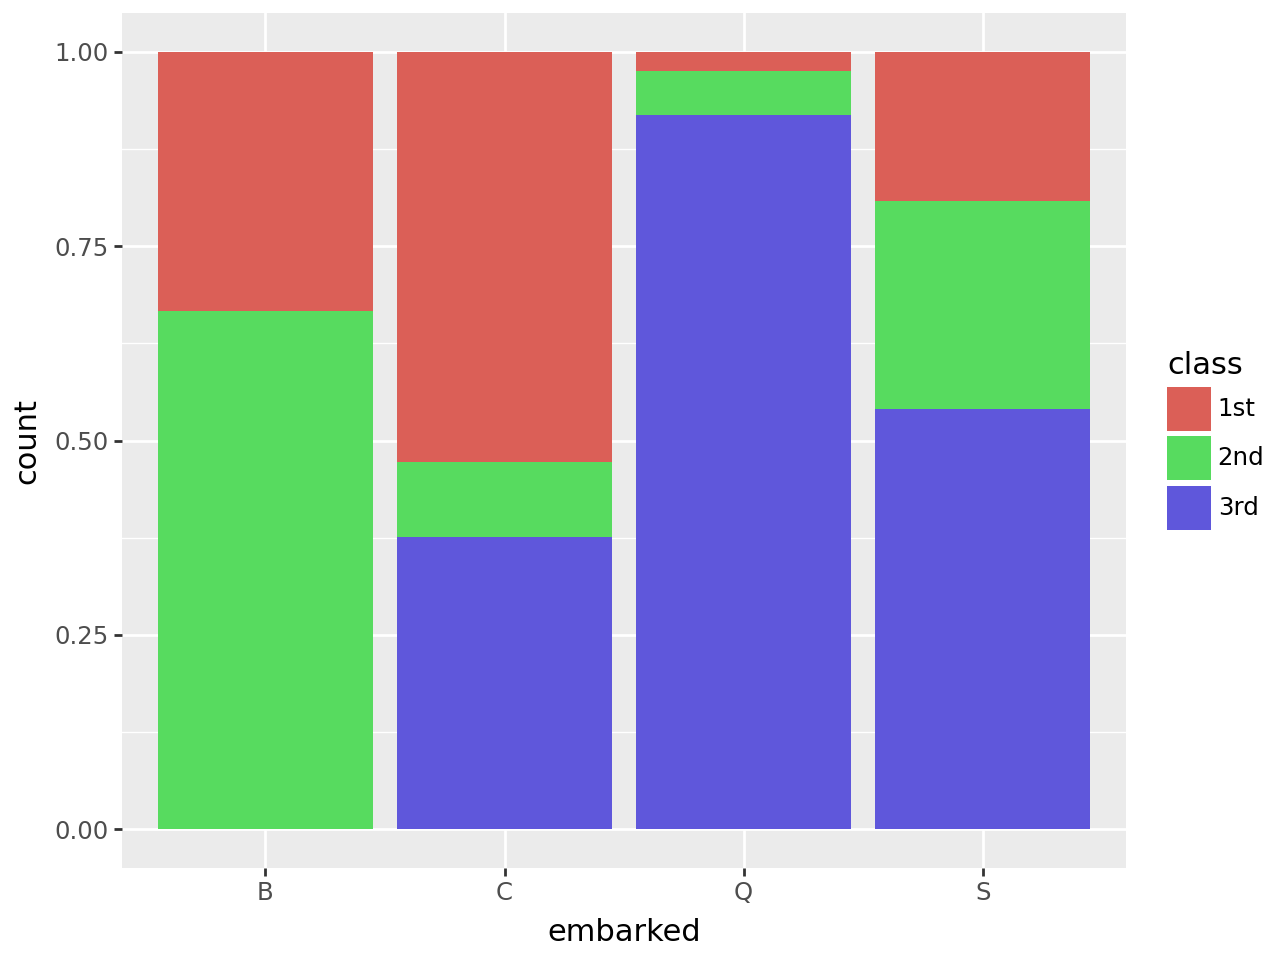

In [13]:
# Code here
from plotnine import ggplot, aes, geom_bar

ggplot(df, aes(x="embarked", fill="class")) + geom_bar(position="fill")